# Lucas-Kanade Tracking

- Create a command-line tool (interactive notebook instead) that accepts the ROI of the target (the portion of the image should be tracked in the video) and the path to the dataset and performs tracking of the target over the image sequence from the dataset. 

- Visualize the current image and highligh the targets location by a rectangle.

- Find conditions where tracking is lost and explain why.

## Problems

- Implement template-matching in Python using SSD, NCC, SAD
- Code Lucas-Kanade algorithm in Python using OpenCV
- Implement pyramidal extension to Lucas-Kanade algorithm
- Test on the 3 datasets 

*Datasets:* http://cvlab.hanyang.ac.kr/tracker_benchmark/datasets.html

In [2]:
import sys
import os
import cv2

sys.path.insert(0, '../helpers/')

In [4]:
from template_matching import * 

In [5]:
%matplotlib inline

In [18]:
work_dir = os.getcwd()
data_dir = os.path.join(work_dir, 'data')
lucas_kanade_data_dir = os.path.join(data_dir, 'lucas_kanade')

# Test images only to compare perfomance of handwritten methods to OpenCV 
patch_img_path = os.path.join(lucas_kanade_data_dir, 'patch.jpg')
test_1 = os.path.join(lucas_kanade_data_dir, '0001.jpg')
test_2 = os.path.join(lucas_kanade_data_dir, '0019.jpg')
test_3 = os.path.join(lucas_kanade_data_dir, '0038.jpg')
test_4 =os.path.join(lucas_kanade_data_dir, '0061.jpg')

## Problem 1. Implement template-matching using SSD, NCC, SAD

The code is located in *helpers/template_matching*. You need to provide image and the patch (cropped part) image to the function. The function will build a bounding box rectangle around found area.

To vary the algorithm you should change *method* parameter. More info in the function documentation inside the script.

## SSD

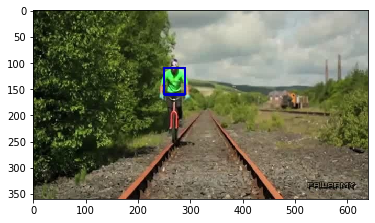

In [9]:
perform_template_matching(test_1, patch_img_path)

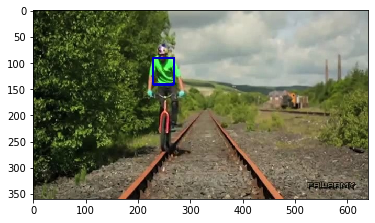

In [10]:
perform_template_matching(test_2, patch_img_path)

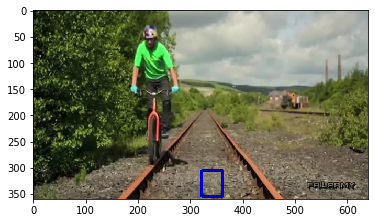

In [20]:
perform_template_matching(test_3, patch_img_path)

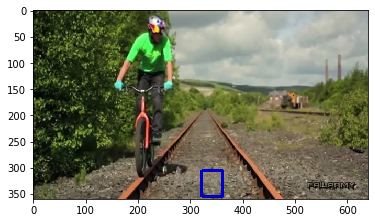

In [19]:
perform_template_matching(test_4, patch_img_path)

## NCC

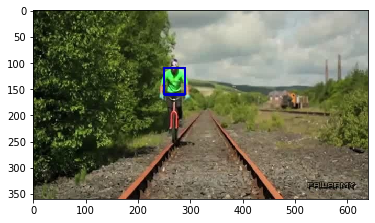

In [12]:
perform_template_matching(test_1, patch_img_path, method = 'ncc')

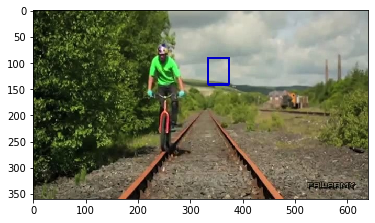

In [13]:
perform_template_matching(test_2, patch_img_path, method = 'ncc')

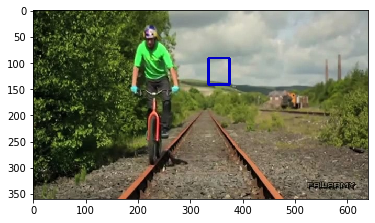

In [14]:
perform_template_matching(test_3, patch_img_path, method = 'ncc')

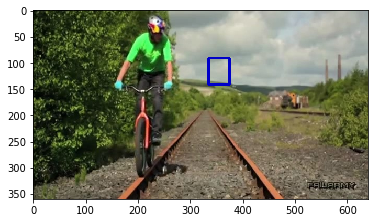

In [21]:
perform_template_matching(test_4, patch_img_path, method = 'ncc')

## SAD

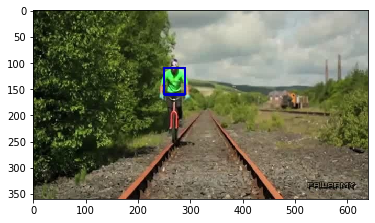

In [15]:
perform_template_matching(test_1, patch_img_path, method = 'sad')

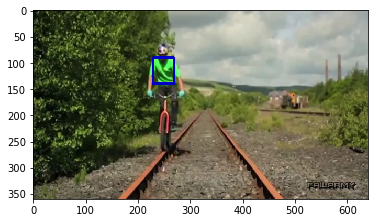

In [16]:
perform_template_matching(test_2, patch_img_path, method = 'sad')

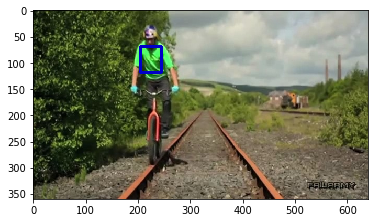

In [17]:
perform_template_matching(test_3, patch_img_path, method = 'sad')

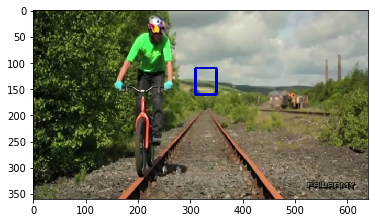

In [22]:
perform_template_matching(test_4, patch_img_path, method = 'sad')

In conclusion we can see that for this example the Sum of Absolute Differences method worked best of all.

## Problem 2. Implement Lucas-Kanade algorithm using OpenCV 

The algorithm is implemented in the separate script in *helpers/lucas_kanade_tracking.py*. 

To run in just run *python lucas_kanade_tracking.py*. This will open your webcam and you can select the desired point of object to track. 

If you want to pass videofile to track object use *python lucas_kanade_tracking.py video_file_name*. It is important for videofile to be in the same directory or otherwise provide path to the videofile.

**How to reproduce:**
- Download video file or sequence of frames (packed in folder)
- If you have a video file that is in the same folder as the script just follow the instructions above 
- If you have a sequence of frames in the folder you should ensure that all frame image files follow the same image convention (for ex. 0001.jpg, 0002.jpg, ..., 1001.jpg).
- If your frame files follow the same convention you must pass an argument to the script with rejex. For the example from previous item you should use something like *"folder_name/%0**4**d.jpg"*, which shows that your files have **4** characters in name that are changing integers (the dataset linked at the beginning of notebook uses exactly this name convention).


You can see the demos of how implemented algorithm performs following the link: https://drive.google.com/drive/folders/1-Yxx20NXjXi2wXd5pGxmdwXBfCJzasTj?usp=sharing

## Problem 3. Improve Lucas-Kanade algorithm with pyramidal extensions

The algorithm is implemented in the separate script in *helpers/lucas_kanade_pyramidal_tracking.py*. 

To run in just run *python lucas_kanade_pyramidal_tracking.py*. This will open your webcam and you can select the desired point of object to track. 

If you want to pass videofile to track object use *python lucas_kanade_pyramidal_tracking.py video_file_name*. It is important for videofile to be in the same directory or otherwise provide path to the videofile.

**How to reproduce:**
Same logic as for classical method but you should use *python lucas_kanade_pyramidal_tracking.py args* instead.

You can see the demos of how implemented algorithm performs following the link: https://drive.google.com/drive/folders/1Hd0SKgGKuxCiyDspEUyy7AeayDqvCIMP?usp=sharing

## Results overview

Even testing on other datasets the most significant problem is lighting change. The Lukas-Kanade algorithm itself is not robust to change of orientation, lighting, size changing or blurring. Some of these problems could be resolved easily (for ex. we can add previous-current frame normalization in order to prevent problems due to lighting changing) but orientation change and size change were pretty strong problems for me during this task and they are not solved fully at now.

In pyramidal version three pyramids were used that provide slightly better results for some of the presented demos.